**EE20MTECH12001 : Shantanu Yadav**

[Problem Statement](https://github.com/Shantanu2508/mtech/blob/master/Convex_Optimization/10/Lab_10-2.pdf)

In [2]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

Minimum k value is  34


Text(0.5, 1.0, 'Tensions')

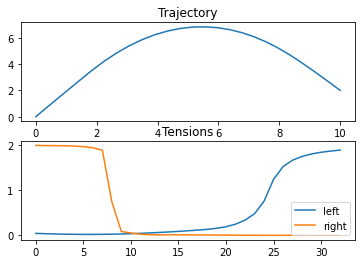

In [3]:
upperBound = 100
lowerBound = 10

theta = 15*np.pi/180

mass = 0.1
Tmax = 2
g = np.array([0,-9.8]).reshape((2,1))
h = 0.1
p_init = np.array([0,0])
p_des = np.array([10,2])
orientation_Matrix = np.array([[- np.sin(theta), np.sin(theta) ], [ np.cos(theta), np.cos(theta) ]])
Feasible_p = 0
Feasible_T = 0
while not lowerBound + 1 == upperBound:
  k = int((upperBound + lowerBound)/2.0)
  #print(k)
  T = cp.Variable((2,k-1))
  p = cp.Variable((2,k))
  v = cp.Variable((2,k))

  F = orientation_Matrix@T + mass*np.tile(g,(1,k-1))

  constraints = [0 <= T, T <= Tmax]
  constraints += [p[:,0] == p_init, p[:,k-1] == p_des]
  constraints += [v[:,0] == 0 , v[:,k-1] == 0]
  constraints += [p[:,1:k] == p[:,0:k-1] + h*v[:,0:k-1]]
  constraints += [v[:,1:k] == v[:,0:k-1] + (h/mass)*F]

  prob = cp.Problem(cp.Minimize(0),constraints)
  optimal_value = prob.solve()
  if optimal_value == 0:
    upperBound = k
    Feasible_T = T.value
    Feasible_p = p.value
  else :
    lowerBound = k
k = upperBound
print('Minimum k value is ', k)
plt.subplot(2,1,1)
plt.plot(Feasible_p[0,:].T,Feasible_p[1,:].T)
plt.title('Trajectory')
plt.subplot(2,1,2)
plt.plot(Feasible_T[0,:].T,label='left')
plt.plot(Feasible_T[1,:].T,label='right')
plt.legend()
plt.title('Tensions')
     

